Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.

Также ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.

Импортируем библиотеки

In [34]:
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [35]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]


In [36]:
data_p = pd.DataFrame({'petersburg':petersburg})
data_m = pd.DataFrame({'magadan':magadan})
data = data_p.join(data_m, how='outer')
data

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


Заполним пропуски. Признак 'petersburg' числовой непрерывный, поэтому будем использовать mean или median в зависимости от распределения.

<AxesSubplot: >

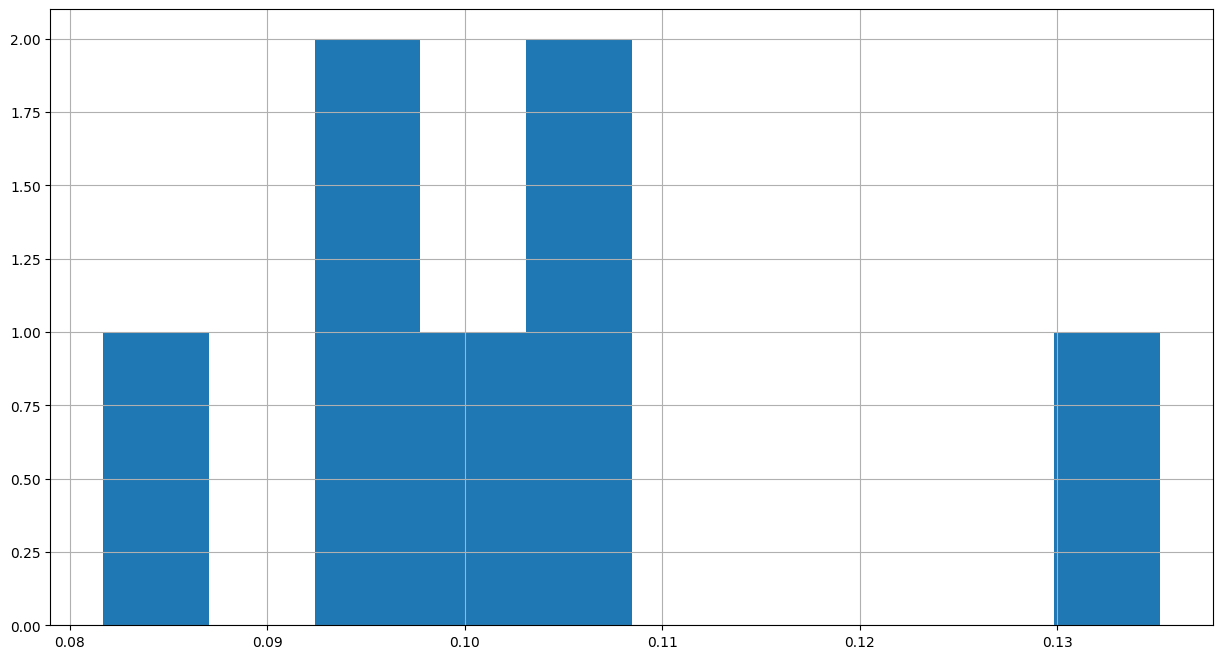

In [37]:
data['petersburg'].hist(figsize=(15,8))

Распределение не является логнормальным, поэтому используем mean.

In [38]:

data = data.fillna({'petersburg':data['petersburg'].mean()})
data

,petersburg,magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


Датасет получен, приступаем к постановке гипотез: нулевая гипотеза утверждает, что разницы в среднем размере мидий нет, независимо от города-производителя. Альтернативная гипотеза говорит, что разница есть.

Выставляем уровень значимости 5%

In [39]:
alpha = 0.05

Для проверки гипотезы используем данные из датасета.
Начинаем с тестов на нормальность.

In [53]:
h0 = 'Данные распределены нормально'
ha = 'Данные не распределены нормально'

Тест Шапиро-Уилка


In [54]:
_, p = shapiro(data)
print('p=%.3f' % p)

if p > alpha:
	print(h0)
else:
	print(ha)

p=0.100
Данные распределены нормально


Тест Д'Агостино

In [55]:
_, p = normaltest(data)
print('p=%.3f' % p[0])

if p[0] > alpha/2:
	print(h0)
else:
	print(ha)

p=0.042
Данные распределены нормально


Тесты показали, что данные распределены нормально. Данные представлены числовым непрерывным типом, поэтому будем использовать параметрические тесты.

In [43]:
H0 = 'Средний размер мидий не зависит от города-производителя.'
Ha = 'Средний размер мидий отличается в зависимости от города-производителя.'

Так как данные непрерывны и распределены нормально, будем проводить тест на корреляцию Пирсона:

In [44]:
corr, p = pearsonr(data['petersburg'], data['magadan'])
print(corr,p)

0.24455753997284532 0.5594098062056254


In [45]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.5594098062056254 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


Тест показал коэффициент корреляции 0.24, что говорит об очень слабой линейной взаимосвязи между признаками. В этом случае целесообразно дополнительно провести корреляцию Спирмена.

In [46]:
corr, p = spearmanr(data['petersburg'], data['magadan'])

In [47]:
print(corr,p)

0.1666666666666667 0.693238811728395


In [48]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.693238811728395 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


Выводы: в обоих случаях результат считается статистически незначимым, значит невозможно опровергнуть нулевую гипотезу об отсутствии разницы среднего размера мидий в разных городах.

Переходим к сравнительным тестам. Независимая переменная: город-производитель - категориальный признак. Зависимая: количественная из разных совокупностей, следовательно выполняем:

Независимый t-тест

In [49]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['petersburg'], data['magadan'], equal_var=True)

    p = test_results[1]

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.0027347063285687095 <= 0.05. Мы отвергаем нулевую гипотезу. Средний размер мидий отличается в зависимости от города-производителя.


И в дополнение проведем однофакторный дисперсионный анализ ANOVA для сравнения средних значений в двух группах:

In [50]:
_, p = f_oneway(data['petersburg'], data['magadan'])

if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")


0.002734706328568715 <= 0.05. Мы отвергаем нулевую гипотезу. Средний размер мидий отличается в зависимости от города-производителя.


Выводы: Таким образом, мы отклонили нулевую гипотезу и подтвердили, что средний размер мидий отличается в зависимости от города-производителя.

И чтобы ответить на вопрос: "Какова разница в среднем размере мидии в зависимости от города-производителя?" были выполнены следующие вычисления:

In [51]:
difference = data['petersburg'].mean()-data['magadan'].mean()
difference

0.025430357142857143

In [52]:
percent = difference/data.mean()*100
percent

petersburg    24.583966
magadan       32.597798
dtype: float64

Разница значительная и составляет 25% и 33% от среднего размера петербургских и магаданских мидий соответственно. Это подтверждает адекватность и результативность проведенного исследования.
